# Experimental data
- Plot experimental figures.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
sys.path.append("../../")
from zeobind.src.utils.utils import setup_mpl, save_mpl_fig, format_axs, get_color_values
setup_mpl() 
colors = get_color_values(10, "viridis")
import warnings
warnings.filterwarnings("ignore")

In [2]:
filename = "../../data/publication/experimental_data.xlsx"
fig_op_dir = "../../data/publication/experimental_data/"
os.makedirs(fig_op_dir, exist_ok=True)

In [3]:
pxrd = pd.read_excel(filename, sheet_name="PXRD")
pxrd = pxrd.iloc[3:, ]
pxrd = pxrd.drop(columns=["Unnamed: 3", "Unnamed: 7", "Unnamed: 11", "Unnamed: 14"])
pxrd.columns = [
    "ERI(Mol-1) 2 theta", "ERI(Mol-1) Intensity", "ERI(Mol-1) Intensity (shifted)", 
    "CHA(Mol-13) 2 theta", "CHA(Mol-13) Intensity", "CHA(Mol-13) Intensity (shifted)", 
    "Fe/CHA(Mol-13) 2 theta", "Fe/CHA(Mol-13) Intensity", "Fe/CHA(Mol-13) Intensity (shifted)", 
    "ERI(Mol-4) 2 theta", "ERI(Mol-4) Intensity", 
    "Fe/CHA(OSDA-1) 2 theta", "Fe/CHA(OSDA-1) Intensity",
    ]
pxrd

,ERI(Mol-1) 2 theta,ERI(Mol-1) Intensity,ERI(Mol-1) Intensity (shifted),CHA(Mol-13) 2 theta,CHA(Mol-13) Intensity,CHA(Mol-13) Intensity (shifted),Fe/CHA(Mol-13) 2 theta,Fe/CHA(Mol-13) Intensity,Fe/CHA(Mol-13) Intensity (shifted),ERI(Mol-4) 2 theta,ERI(Mol-4) Intensity,Fe/CHA(OSDA-1) 2 theta,Fe/CHA(OSDA-1) Intensity
3,4.0056,525.0015,525.0015,4.0056,444.60126,444.60126,4.006,486,15486.0,4.006,486,4.006,457
4,4.0186,498.2716,498.2716,4.0186,405.39591,405.39591,4.019,502,15502.0,4.019,520,4.019,431
5,4.0316,510.7458,510.7458,4.0316,452.63907,452.63907,4.032,534,15534.0,4.032,528,4.032,465
6,4.0446,462.4743,462.4743,4.0446,423.02502,423.02502,4.045,500,15500.0,4.045,511,4.045,413
7,4.0576,496.5345,496.5345,4.0576,422.96733,422.96733,4.058,492,15492.0,4.058,467,4.058,492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,34.9326,800.4514,800.4514,34.9326,1640.0511,1640.05110,34.933,2065,17065.0,34.933,794,34.933,1244
2383,34.9456,790.0005,790.0005,34.9456,1748.1204,1748.12040,34.946,2041,17041.0,34.946,794,34.946,1219
2384,34.9586,788.0074,788.0074,34.9586,1778.0706,1778.07060,34.959,1986,16986.0,34.959,768,34.959,1186
2385,34.9716,789.2412,789.2412,34.9716,1800.1422,1800.14220,34.972,1973,16973.0,34.972,772,34.972,1231


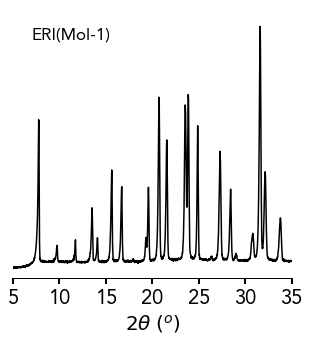

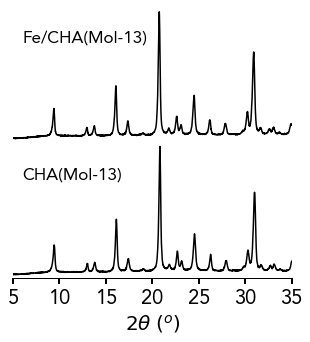

In [4]:
ylims = [(0, 12500), (0, 15000), (0, 30000)]
mats = ["ERI(Mol-1)", "CHA(Mol-13)", "Fe/CHA(Mol-13)"]
figsize = (5, 5)

# ERI(Mol-1)
ylim = ylims[0]; mat = mats[0];
fig, axs = plt.subplots(figsize=figsize)
kwargs = dict(color="k", rasterized=True)
axs.plot(pxrd[f"{mat} 2 theta"], pxrd[f"{mat} Intensity (shifted)"], label=mat, **kwargs)
axs = format_axs(axs, 20, 20, 1, r"$2\theta \; (^o)$", "", 20, 20, limits=dict(x=(5, 35), y=ylim))
axs.set_xticks(np.arange(5, 36, 5))
axs.annotate(mat, (7, 11000), fontsize=17)
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.set_yticklabels([]);
axs.set_yticks([])
save_mpl_fig(fig, f"{fig_op_dir}/ERI(Mol-1)_PXRD", ending=".png")
save_mpl_fig(fig, f"{fig_op_dir}/ERI(Mol-1)_PXRD", ending=".svg")


# CHA(Mol-13) and Fe/CHA(Mol-13)
fig, axs = plt.subplots(figsize=figsize)
for i, mat in enumerate(mats[1:]):
    ylim = ylims[i+1]
    kwargs = dict(color="k", rasterized=True)
    axs.plot(pxrd[f"{mat} 2 theta"], pxrd[f"{mat} Intensity (shifted)"], label=mat, **kwargs)
    axs = format_axs(axs, 20, 20, 1, r"$2\theta \; (^o)$", "", 20, 20, limits=dict(x=(5, 35), y=ylim))
    axs.set_xticks(np.arange(5, 36, 5))
    axs.annotate(mat, (ylim[0] + 6, ylim[1] - 4000), fontsize=17)
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.set_yticklabels([])
axs.set_yticks([]);
save_mpl_fig(fig, f"{fig_op_dir}/CHA(Mol-13)_Fe-CHA(Mol-13)_PXRD", ending=".png")
save_mpl_fig(fig, f"{fig_op_dir}/CHA(Mol-13)_Fe-CHA(Mol-13)_PXRD", ending=".svg")

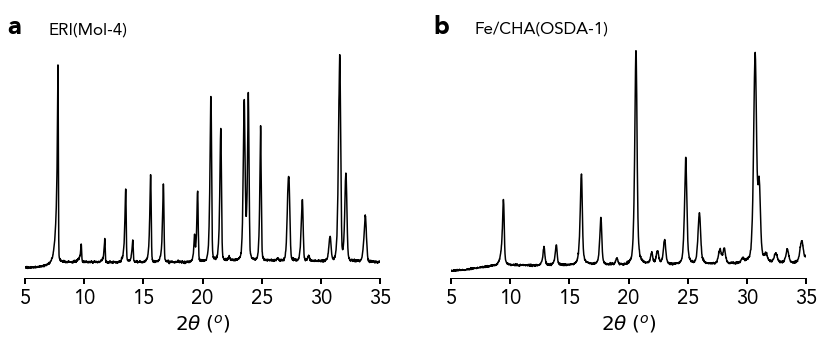

In [5]:
# SI 

ylims = [(0, 12500), (0, 15000)]
mats = ["ERI(Mol-4)", "Fe/CHA(OSDA-1)"]
figsize = (14, 5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
fig_labels = ["a", "b"]

# ERI(Mol-4) and Fe/CHA(OSDA-1)
for i, mat in enumerate(mats):
    ylim = ylims[i]; mat = mats[i]
    kwargs = dict(color="k", rasterized=True)
    axs[i].plot(pxrd[f"{mat} 2 theta"], pxrd[f"{mat} Intensity"], label=mat, **kwargs)
    axs[i] = format_axs(axs[i], 20, 20, 1, r"$2\theta \; (^o)$", "", 20, 20, limits=dict(x=(5, 35), y=ylim))
    axs[i].set_xticks(np.arange(5, 36, 5));
    axs[i].annotate(mat, (7, ylim[1] * 0.9), fontsize=17);
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["left"].set_visible(False)
    axs[i].set_yticklabels([])
    axs[i].set_yticks([])
    axs[i].annotate(fig_labels[i], (-0.05, 0.9), xycoords="axes fraction", fontsize=25, weight='bold')
    save_mpl_fig(fig, f"{fig_op_dir}/SI_PXRD", ending=".png")
    save_mpl_fig(fig, f"{fig_op_dir}/SI_PXRD", ending=".svg")

In [6]:
cnmr = pd.read_excel(filename, sheet_name="C NMR")
cnmr = cnmr.iloc[3:, ]
cnmr = cnmr.drop(columns=["Unnamed: 3", "Unnamed: 7", "Unnamed: 11"])
cnmr
cnmr.columns = [
    "ERI(Mol-1) delta", "ERI(Mol-1) Intensity", "ERI(Mol-1) Intensity (shifted)", 
    "Mol-ERI-1 delta", "Mol-ERI-1 Intensity", "Mol-ERI-1 Intensity (shifted)", 
    "CHA(Mol-13) delta", "CHA(Mol-13) Intensity", "CHA(Mol-13) Intensity (shifted)", 
    "Mol-CHA-13 delta", "Mol-CHA-13 Intensity", "Mol-CHA-13 Intensity (shifted)", 
    ]
cnmr

,ERI(Mol-1) delta,ERI(Mol-1) Intensity,ERI(Mol-1) Intensity (shifted),Mol-ERI-1 delta,Mol-ERI-1 Intensity,Mol-ERI-1 Intensity (shifted),CHA(Mol-13) delta,CHA(Mol-13) Intensity,CHA(Mol-13) Intensity (shifted),Mol-CHA-13 delta,Mol-CHA-13 Intensity,Mol-CHA-13 Intensity (shifted)
3,289.22,0.271860,55.271860,-18.19,33469600.0,0.033470,285.024,25.5648,55.191736,218.197,-5882.460,-0.235298
4,289.215,0.274586,55.274586,-18.1828,-296960.0,-0.000297,285.014,29.0995,55.218246,218.19,-6192.720,-0.247709
5,289.21,0.276875,55.276875,-18.1755,21685000.0,0.021685,285.003,33.6111,55.252083,218.183,-5948.470,-0.237939
6,289.205,0.278679,55.278679,-18.1683,-127456000.0,-0.127456,284.993,38.9029,55.291772,218.176,749.434,0.029977
7,289.2,0.279954,55.279954,-18.1611,-178365000.0,-0.178365,284.982,44.7283,55.335462,218.168,3213.290,0.128532
...,...,...,...,...,...,...,...,...,...,...,...,...
65533,-42.0901,0.064299,55.064299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65534,-42.0952,0.064670,55.064670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65535,-42.1002,0.064531,55.064530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65536,-42.1053,0.063879,55.063879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


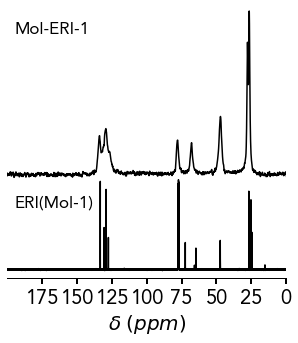

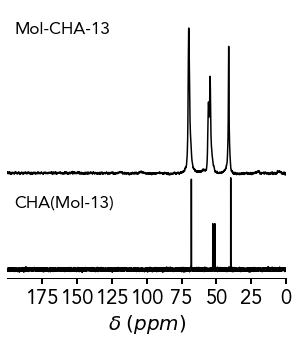

In [7]:
ylims = [(-5, 51), (-5, 150), (0, 51)]
xlim = (200, 0)
mats = ["ERI(Mol-1)", "Mol-ERI-1", "CHA(Mol-13)", "Mol-CHA-13"]
figsize = (5, 5)

# ERI(Mol-1) and Mol-ERI-2
fig, axs = plt.subplots(figsize=figsize)
for i, mat in enumerate(mats[:2]):
    ylim = ylims[i]
    kwargs = dict(color="k", rasterized=True)
    axs.plot(cnmr[f"{mat} delta"], cnmr[f"{mat} Intensity (shifted)"], label=mat, **kwargs)
    axs = format_axs(axs, 20, 20, 1, r"$\delta \; (ppm)$", "", 20, 20, limits=dict(x=xlim, y=ylim))
    axs.set_xticks(np.arange(0, 176, 25));
    axs.annotate(mat, (xlim[0] - 5, ylim[1] - 15), fontsize=17);
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.set_yticklabels([])
axs.set_yticks([])
save_mpl_fig(fig, f"{fig_op_dir}/ERI(Mol-1)_NMR", ending=".png")
save_mpl_fig(fig, f"{fig_op_dir}/ERI(Mol-1)_NMR", ending=".svg")


# CHA(Mol-13) and Mol-CHA-13
fig, axs = plt.subplots(figsize=figsize)
for i, mat in enumerate(mats[2:]):
    ylim = ylims[i]
    kwargs = dict(color="k", rasterized=True)
    axs.plot(cnmr[f"{mat} delta"], cnmr[f"{mat} Intensity (shifted)"], label=mat, **kwargs)
    axs = format_axs(axs, 20, 20, 1, r"$\delta \; (ppm)$", "", 20, 20, limits=dict(x=xlim, y=ylim))
    axs.set_xticks(np.arange(0, 176, 25));
    axs.annotate(mat, (xlim[0] - 5, ylim[1] - 15), fontsize=17);
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.set_yticklabels([])
axs.set_yticks([]);
save_mpl_fig(fig, f"{fig_op_dir}/CHA(Mol-13)_NMR", ending=".png")
save_mpl_fig(fig, f"{fig_op_dir}/CHA(Mol-13)_NMR", ending=".svg")

In [8]:
al_nmr = pd.read_excel(filename, sheet_name="Al NMR")
al_nmr = al_nmr.iloc[5:, :]
al_nmr = al_nmr.drop(columns=["Unnamed: 3", ])
al_nmr.columns = [ 
    "ERI(Mol-1) delta", "ERI(Mol-1) Intensity", "ERI(Mol-1) Intensity (shifted)",
    "CHA(Mol-13) delta", "CHA(Mol-13) Intensity", "CHA(Mol-13) Intensity (shifted)",
]
al_nmr

,ERI(Mol-1) delta,ERI(Mol-1) Intensity,ERI(Mol-1) Intensity (shifted),CHA(Mol-13) delta,CHA(Mol-13) Intensity,CHA(Mol-13) Intensity (shifted)
5,-106.123,3.66633,1103.66633,573.905,-1.43781,48.56219
6,-106.109,3.62799,1103.62799,573.89,-1.44066,48.55934
7,-106.094,3.58725,1103.58725,573.876,-1.44293,48.55707
8,-106.08,3.54426,1103.54426,573.861,-1.44458,48.55542
9,-106.065,3.49920,1103.49920,573.847,-1.44555,48.55445
...,...,...,...,...,...,...
65534,NaN,NaN,NaN,-372.598,-13.15070,36.84930
65535,NaN,NaN,NaN,-372.613,-13.14670,36.85330
65536,NaN,NaN,NaN,-372.627,-13.14250,36.85750
65537,NaN,NaN,NaN,-372.641,-13.13820,36.86180


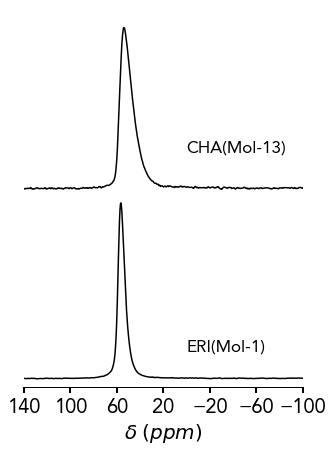

In [9]:
ylims = [(0, 1000), (0, 2100)]
xlims = [(-100, 140), (-100, 140)]
mats = ["ERI(Mol-1)", "CHA(Mol-13)", ]
figsize = (5, 7)

# ERI(Mol-1) and CHA(Mol-13)
fig, axs = plt.subplots(figsize=figsize)
for i, mat in enumerate(mats):
    ylim = ylims[i]
    xlim = xlims[i]
    kwargs = dict(color="k", rasterized=True)
    axs.plot(al_nmr[f"{mat} delta"], al_nmr[f"{mat} Intensity (shifted)"], label=mat, **kwargs)
    axs = format_axs(axs, 20, 20, 1, r"$\delta \; (ppm)$", "", 20, 20, limits=dict(x=xlim, y=ylim))
    axs.set_xticks(np.arange(-100, 141, 40));
    axs.annotate(mat, (xlim[0] + 100, ylim[1] - 800), fontsize=17);
    # axs.annotate(mat, (0, 0), fontsize=17);

axs.invert_xaxis()
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
axs.spines["left"].set_visible(False)
axs.set_yticklabels([])
axs.set_yticks([])

save_mpl_fig(fig, f"{fig_op_dir}/Al_NMR", ending=".png")
save_mpl_fig(fig, f"{fig_op_dir}/Al_NMR", ending=".svg")

In [10]:
scr_eri = pd.read_excel(filename, sheet_name="SCR-ERI")
scr_eri = scr_eri.iloc[2:]
scr_eri = scr_eri.drop(columns=["Unnamed: 2", "Unnamed: 5", "Unnamed: 8"])
scr_eri.columns = [
    "Cu/ERI(Mol-1) T (oC)", "Cu/ERI(Mol-1) NOx conv (%)", 
    "Cu/ERI(Mol-1)_HT750 T (oC)", "Cu/ERI(Mol-1)_HT750 NOx conv (%)", 
    "Cu/ERI(OSDA-1) T (oC)", "Cu/ERI(OSDA-1) NOx conv (%)", 
    "Cu/ERI(OSDA-1)_HT750 T (oC)", "Cu/ERI(OSDA-1)_HT750 NOx conv (%)", 
]
scr_eri 

,Cu/ERI(Mol-1) T (oC),Cu/ERI(Mol-1) NOx conv (%),Cu/ERI(Mol-1)_HT750 T (oC),Cu/ERI(Mol-1)_HT750 NOx conv (%),Cu/ERI(OSDA-1) T (oC),Cu/ERI(OSDA-1) NOx conv (%),Cu/ERI(OSDA-1)_HT750 T (oC),Cu/ERI(OSDA-1)_HT750 NOx conv (%)
2,550,83.316953,550,60.536229,550,76.397967,550,16.995056
3,450,92.182265,450,75.625969,500,79.937908,500,23.121469
4,350,97.230288,350,87.177044,450,81.340959,450,31.112288
5,250,93.156131,250,78.284955,400,81.583515,400,37.100989
6,210,79.790038,210,59.539109,350,88.436456,350,43.516949
7,170,41.925396,170,35.342344,300,89.233842,300,46.370056
8,NaN,NaN,NaN,NaN,250,77.973856,250,30.829802
9,NaN,NaN,NaN,NaN,210,57.211329,210,17.634181
10,NaN,NaN,NaN,NaN,170,16.684822,170,8.319209


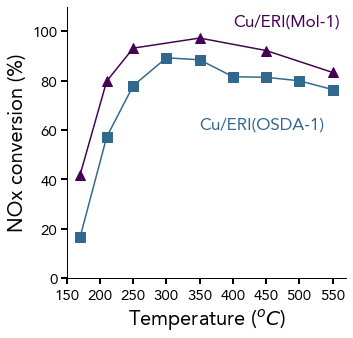

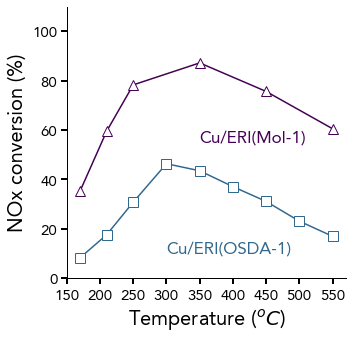

In [11]:
markers = ["^", "s"]
color_idx = [0, 3]
label_pos = [
    ((400, 102), (350, 60)),
    ((350, 55), (300, 10)),
    ]
mat_types = ["(fresh)", "(aged)"]

for j, mat_type in enumerate(mat_types):
    fig, axs = plt.subplots(figsize=(5, 5))
    for sp in ["top", "right"]:
        axs.spines[sp].set_visible(False)
    for i, mat in enumerate(["Cu/ERI(Mol-1)", "Cu/ERI(OSDA-1)"]):
        kwargs = dict(marker=markers[i], markersize=10, 
                      markerfacecolor=colors[color_idx[i]] if mat_type == "(fresh)" else "white",
                      markeredgecolor=colors[color_idx[i]],
                      color=colors[color_idx[i]],
                      )
        xlab = f"{mat} T (oC)" if mat_type == "(fresh)" else f"{mat}_HT750 T (oC)"
        ylab = f"{mat} NOx conv (%)" if mat_type == "(fresh)" else f"{mat}_HT750 NOx conv (%)"
        axs.plot(scr_eri[xlab], scr_eri[ylab], label=mat, **kwargs)
        axs = format_axs(axs, 15, 15, 1, r"Temperature ($^oC$)", "NOx conversion (%)", 20, 20, limits=dict(x=(150, 570), y=(0, 110)))
        axs.set_xticks(np.arange(150, 551, 50));
        axs.annotate(mat, label_pos[j][i], fontsize=17, color=colors[color_idx[i]]);

    save_mpl_fig(fig, f"{fig_op_dir}/SCR-ERI{mat_type}", ending=".png")
    save_mpl_fig(fig, f"{fig_op_dir}/SCR-ERI{mat_type}", ending=".svg")

In [12]:
scr_cha = pd.read_excel(filename, sheet_name="SCR-CHA")
scr_cha = scr_cha.iloc[2:]
scr_cha = scr_cha.drop(columns=["Unnamed: 2", "Unnamed: 5", "Unnamed: 8"])
scr_cha.columns = [
    "Fe/CHA(Mol-13) T (oC)", "Fe/CHA(Mol-13) NOx conv (%)", 
    "Fe/CHA(Mol-13)_HT600 T (oC)", "Fe/CHA(Mol-13)_HT600 NOx conv (%)", 
    "Fe/CHA(OSDA-1) T (oC)", "Fe/CHA(OSDA-1) NOx conv (%)", 
    "Fe/CHA(OSDA-1)_HT600 T (oC)", "Fe/CHA(OSDA-1)_HT600 NOx conv (%)", 
]
scr_cha

,Fe/CHA(Mol-13) T (oC),Fe/CHA(Mol-13) NOx conv (%),Fe/CHA(Mol-13)_HT600 T (oC),Fe/CHA(Mol-13)_HT600 NOx conv (%),Fe/CHA(OSDA-1) T (oC),Fe/CHA(OSDA-1) NOx conv (%),Fe/CHA(OSDA-1)_HT600 T (oC),Fe/CHA(OSDA-1)_HT600 NOx conv (%)
2,500,62.16096,500,92.378815,500,93.76799,500,67.402423
3,450,89.195198,450,92.037702,450,95.736154,450,61.673396
4,400,93.730547,400,87.423698,400,94.090711,400,49.484074
5,350,92.690084,350,77.648115,350,82.398604,350,35.397039
6,300,77.074255,300,62.746858,300,43.349324,300,20.233288
7,250,40.462428,250,34.605027,250,16.572176,250,6.37057


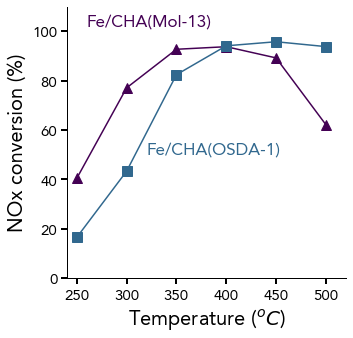

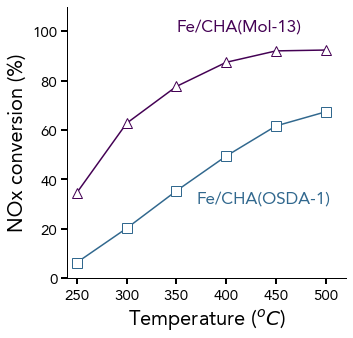

In [13]:
markers = ["^", "s"]
color_idx = [0, 3]
label_pos = [
    ((260, 102), (320, 50)),
    ((350, 100), (370, 30)),
    ]
mat_types = ["(fresh)", "(aged)"]

for j, mat_type in enumerate(mat_types):
    fig, axs = plt.subplots(figsize=(5, 5))
    for sp in ["top", "right"]:
        axs.spines[sp].set_visible(False)
    for i, mat in enumerate(["Fe/CHA(Mol-13)", "Fe/CHA(OSDA-1)"]):
        kwargs = dict(marker=markers[i], markersize=10, 
                      markerfacecolor=colors[color_idx[i]] if mat_type == "(fresh)" else "white",
                      markeredgecolor=colors[color_idx[i]],
                      color=colors[color_idx[i]],
                      )
        xlab = f"{mat} T (oC)" if mat_type == "(fresh)" else f"{mat}_HT600 T (oC)"
        ylab = f"{mat} NOx conv (%)" if mat_type == "(fresh)" else f"{mat}_HT600 NOx conv (%)"
        axs.plot(scr_cha[xlab], scr_cha[ylab], label=mat, **kwargs)
        axs = format_axs(axs, 15, 15, 1, r"Temperature ($^oC$)", "NOx conversion (%)", 20, 20, limits=dict(x=(240, 520), y=(0, 110)))
        axs.set_xticks(np.arange(250, 520, 50));
        axs.annotate(mat, label_pos[j][i], fontsize=17, color=colors[color_idx[i]]);
    # axs.legend()

    save_mpl_fig(fig, f"{fig_op_dir}/SCR-CHA{mat_type}", ending=".png")
    save_mpl_fig(fig, f"{fig_op_dir}/SCR-CHA{mat_type}", ending=".svg")

In [14]:
uvvis = pd.read_excel(filename, sheet_name="UV-Vis")
uvvis = uvvis.iloc[5:]
uvvis = uvvis.drop(columns=["Unnamed: 3", "Unnamed: 7", "Unnamed: 11"])
uvvis.columns = [
    "Fe/CHA(Mol-13) fresh Wavelength (nm)", "Fe/CHA(Mol-13) fresh Absorbance", "Fe/CHA(Mol-13) fresh Absorbance (shifted)",
    "Fe/CHA(Mol-13) HT600 Wavelength (nm)", "Fe/CHA(Mol-13) HT600 Absorbance", "Fe/CHA(Mol-13) HT600 Absorbance (shifted)",
    "Fe/CHA(OSDA-1) fresh Wavelength (nm)", "Fe/CHA(OSDA-1) fresh Absorbance", "Fe/CHA(OSDA-1) fresh Absorbance (shifted)",
    "Fe/CHA(OSDA-1) HT600 Wavelength (nm)", "Fe/CHA(OSDA-1) HT600 Absorbance", "Fe/CHA(OSDA-1) HT600 Absorbance (shifted)",
]
uvvis

,Fe/CHA(Mol-13) fresh Wavelength (nm),Fe/CHA(Mol-13) fresh Absorbance,Fe/CHA(Mol-13) fresh Absorbance (shifted),Fe/CHA(Mol-13) HT600 Wavelength (nm),Fe/CHA(Mol-13) HT600 Absorbance,Fe/CHA(Mol-13) HT600 Absorbance (shifted),Fe/CHA(OSDA-1) fresh Wavelength (nm),Fe/CHA(OSDA-1) fresh Absorbance,Fe/CHA(OSDA-1) fresh Absorbance (shifted),Fe/CHA(OSDA-1) HT600 Wavelength (nm),Fe/CHA(OSDA-1) HT600 Absorbance,Fe/CHA(OSDA-1) HT600 Absorbance (shifted)
5,798,0.028527,0.028527,3298,2.965574,2.965574,3298,0.175641,0.175641,3298,0.085373,0.085373
6,797,0.028271,0.028271,3297,2.908963,2.908963,3297,0.203672,0.203672,3297,0.095349,0.095349
7,796,0.028138,0.028138,3296,3.164113,3.164113,3296,0.196615,0.196615,3296,0.089296,0.089296
8,795,0.028498,0.028498,3295,3.32954,3.329540,3295,0.227754,0.227754,3295,0.091687,0.091687
9,794,0.028106,0.028106,3294,2.865388,2.865388,3294,0.211715,0.211715,3294,0.092841,0.092841
...,...,...,...,...,...,...,...,...,...,...,...,...
3099,NaN,NaN,NaN,204,0.656364,0.656364,204,3.357033,3.357033,204,3.708306,3.708306
3100,NaN,NaN,NaN,203,0.659618,0.659618,203,3.119492,3.119492,203,3.809169,3.809169
3101,NaN,NaN,NaN,202,0.648236,0.648236,202,2.99396,2.993960,202,3.749547,3.749547
3102,NaN,NaN,NaN,201,0.648305,0.648305,201,2.869134,2.869134,201,3.829852,3.829852


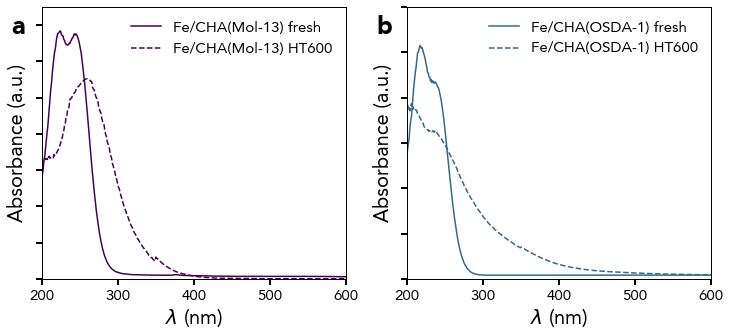

In [15]:

mats = ["Fe/CHA(Mol-13)", "Fe/CHA(OSDA-1)"]
markers = ["-", "--"]
ylims = [(0.0, 1.5), (0.0, 6)]
color_idx = [0, 3]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig_labels = ["a", "b"]

for i, mat in enumerate(mats):
    # for sp in ["top", "right"]:
    #     axs.spines[sp].set_visible(False)
    axs[i].plot(
        uvvis[f"{mat} fresh Wavelength (nm)"], 
        uvvis[f"{mat} fresh Absorbance (shifted)"], 
        markers[0], label=f"{mat} fresh", color=colors[color_idx[i]],
        )
    axs[i].plot(
        uvvis[f"{mat} HT600 Wavelength (nm)"], 
        uvvis[f"{mat} HT600 Absorbance (shifted)"], 
        markers[1], label=f"{mat} HT600", color=colors[color_idx[i]],
        )
    axs[i] = format_axs(axs[i], 15, 15, 1, r"$\lambda$ (nm)", "Absorbance (a.u.)", 20, 20, limits=dict(x=(200, 600), y=ylims[i]))
    # legend 
    axs[i].legend(frameon=False, fontsize=15)
    axs[i].set_yticklabels([])

    mat_renamed = mat.replace("/", "-")
    axs[i].annotate(fig_labels[i], (-0.1, 0.9), xycoords="axes fraction", fontsize=25, weight="bold")

save_mpl_fig(fig, f"{fig_op_dir}/UV-Vis", ending=".png")
save_mpl_fig(fig, f"{fig_op_dir}/UV-Vis", ending=".svg")